In [1]:
import h5py
import sys
import time
sys.path.append("/users/munozr/mycodes")
import numpy as np
from pylab import *
import matplotlib as mpl
import matplotlib.pyplot as plt
from data_analysis_codes.tools import ReadingTools as RRead
from data_analysis_codes.tools import GetVars_Plot2d as GVar
from data_analysis_codes.tools import LinData
from matplotlib.collections import LineCollection
from data_analysis_codes.tools import Cstyle
plt.style.use(Cstyle.style1)
from data_analysis_codes.tools.lineint import lineint

In [2]:
param32 = RRead.read_parameters('pflrw_d3e2_L1206_t1_N32_EdS_GRH_spin_CPunc_MR')
Lin32 = LinData.LinData_Class(param32)
all_h5it32 = RRead.collect_h5iteration(Lin32.param)
all_h5it32 = all_h5it32[0::2]
L = param32['Lx']

 read time file


In [3]:
def make_big_array(data):
    N = [np.shape(d)[0] for d in data]
    xbig = np.arange(-L/2, L/2, param32['dx']/(2**(len(data)-1))) / L
    Nbig = len(xbig)
    big_data = np.zeros((Nbig, Nbig, Nbig))

    for rl in range(len(data)):
        dxg = param32['dx']/(2**rl)
        Lg = N[rl]*dxg
        xmin = (-Lg/2 + (dxg/2)*(N[rl]%2))/L
        imin = np.argmin(abs(xbig - xmin))
        nrepeat = 2**(3-rl)
        imax = imin + N[rl]*nrepeat
        big_data[imin:imax, imin: imax, imin:imax] = np.repeat(np.repeat(np.repeat(
            data[rl], nrepeat, axis=0), nrepeat, axis=1), nrepeat, axis=2)
    return xbig, big_data

def cut(rl, data):
    if rl > 1:
        icut = 3
        return RRead.fixij(data[icut:-icut, icut:-icut, icut:-icut])
    else:
        return RRead.fixij(data)

In [4]:
rl = 3
Ng = 29
dxg = param32['dx']/(2**rl)
Lg = Ng*dxg
xmin = (-Lg/2 + (dxg/2)*(Ng%2))
N = L/dxg
xdomain = [xmin, xmin+L, dxg]
starting_point = [int(N/2)]*3
li = lineint.LineIntegrate(xdomain, xdomain, xdomain, starting_point)

In [5]:
f = h5py.File('/users/munozr/simulations/' + param32['simname']
              + '/proper_distance_weight.hdf5', 'w') 

for ix in RRead.progressbar(range(li.Nx)):
    for iy in range(li.Ny):
        for iz in range(li.Nz):
            end_point = (ix, iy, iz)
            indices, segments, theta, phi = li.segments_idx_end(end_point)
            f.create_dataset('({},{},{}) indices'.format(ix, iy, iz), 
                             data=indices)
            f.create_dataset('({},{},{}) segments'.format(ix, iy, iz), 
                             data=segments)
            
f.close()

[..............................] 0.04% Est wait 00d 00h 00m 0.0s

KeyboardInterrupt: 

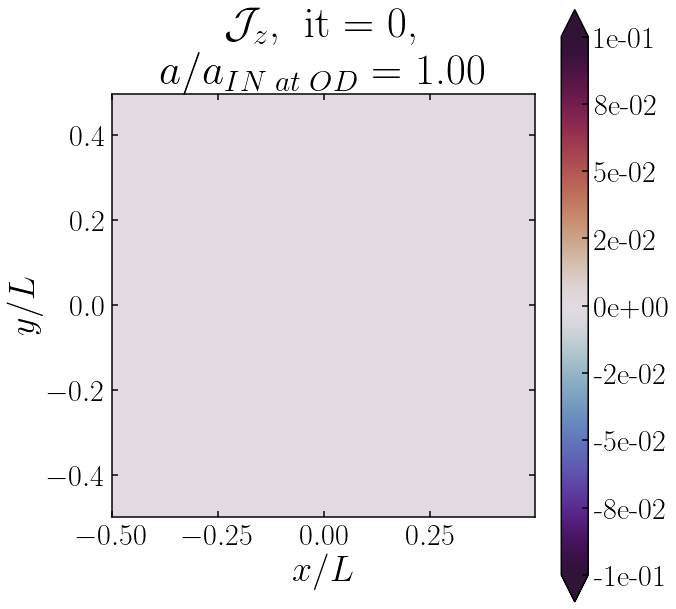

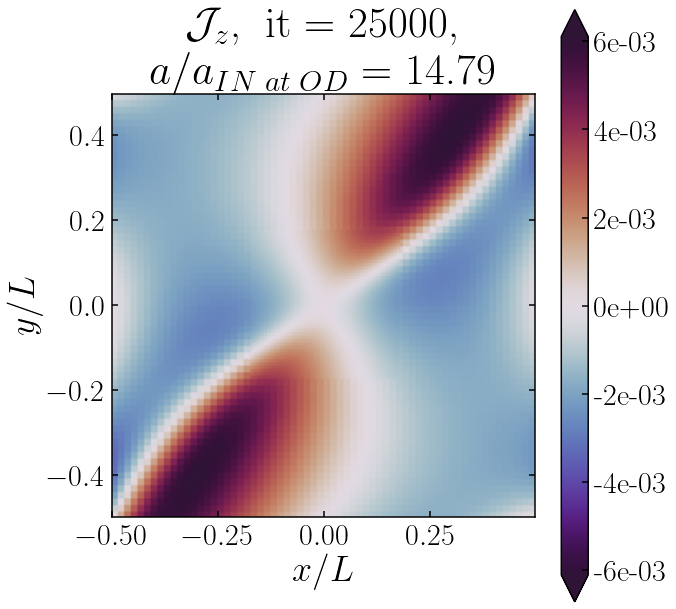

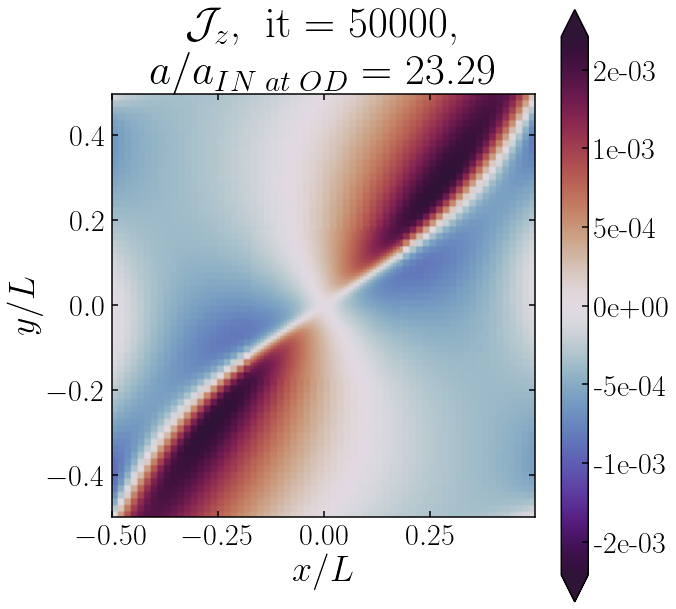

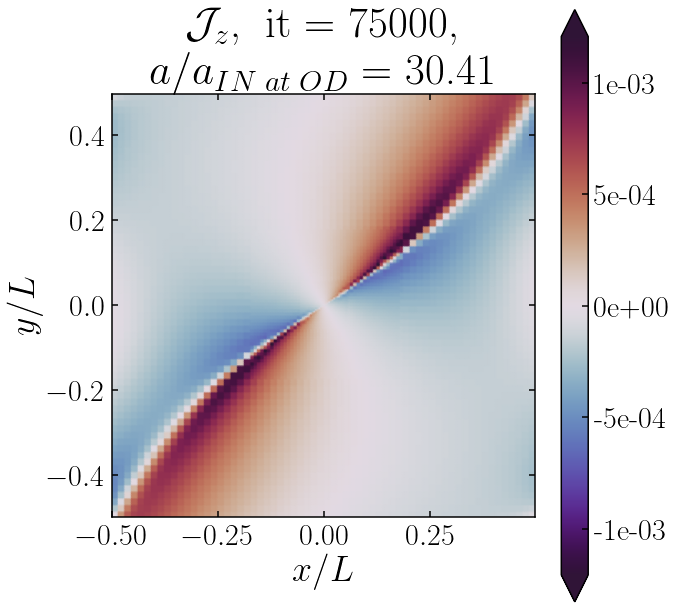

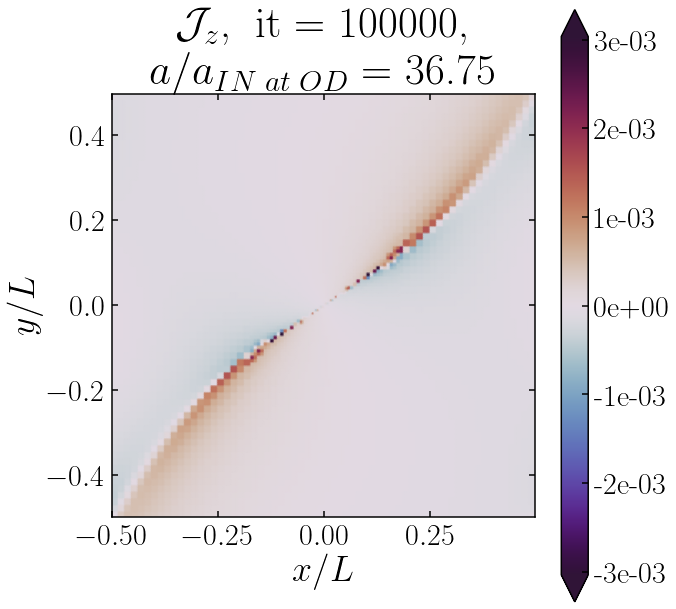

In [27]:
mpl.rcParams['font.size'] = 30
mpl.rcParams['image.cmap'] = 'twilight_shifted'
allit = np.append(np.arange(0, 73600, 200), 
                  np.arange(73800, 120000, 200))

for it in [0, 25000, 50000, 75000, 100000]:#RRead.progressbar(allit):
    data = []
    for rl in range(4):
        f = h5py.File(param32['h5datapath']+param32['simname']+'_it_{:06d}.hdf5'.format(it),'r')
        alpha = cut(rl, np.array(f['ADMBASE::alp it={} tl=0 rl={}'.format(it, rl)]))
        betax = cut(rl, np.array(f['ADMBASE::betax it={} tl=0 rl={}'.format(it, rl)]))
        betay = cut(rl, np.array(f['ADMBASE::betay it={} tl=0 rl={}'.format(it, rl)]))
        betaz = cut(rl, np.array(f['ADMBASE::betaz it={} tl=0 rl={}'.format(it, rl)]))
        gxx = cut(rl, np.array(f['ADMBASE::gxx it={} tl=0 rl={}'.format(it, rl)]))
        gxy = cut(rl, np.array(f['ADMBASE::gxy it={} tl=0 rl={}'.format(it, rl)]))
        gxz = cut(rl, np.array(f['ADMBASE::gxz it={} tl=0 rl={}'.format(it, rl)]))
        gyy = cut(rl, np.array(f['ADMBASE::gyy it={} tl=0 rl={}'.format(it, rl)]))
        gyz = cut(rl, np.array(f['ADMBASE::gyz it={} tl=0 rl={}'.format(it, rl)]))
        gzz = cut(rl, np.array(f['ADMBASE::gzz it={} tl=0 rl={}'.format(it, rl)]))
        Ttt = cut(rl, np.array(f['TMUNUBASE::eTtt it={} tl=0 rl={}'.format(it, rl)]))
        Ttx = cut(rl, np.array(f['TMUNUBASE::eTtx it={} tl=0 rl={}'.format(it, rl)]))
        Tty = cut(rl, np.array(f['TMUNUBASE::eTty it={} tl=0 rl={}'.format(it, rl)]))
        Ttz = cut(rl, np.array(f['TMUNUBASE::eTtz it={} tl=0 rl={}'.format(it, rl)]))
        Txx = cut(rl, np.array(f['TMUNUBASE::eTxx it={} tl=0 rl={}'.format(it, rl)]))
        Txy = cut(rl, np.array(f['TMUNUBASE::eTxy it={} tl=0 rl={}'.format(it, rl)]))
        Txz = cut(rl, np.array(f['TMUNUBASE::eTxz it={} tl=0 rl={}'.format(it, rl)]))
        Tyy = cut(rl, np.array(f['TMUNUBASE::eTyy it={} tl=0 rl={}'.format(it, rl)]))
        Tyz = cut(rl, np.array(f['TMUNUBASE::eTyz it={} tl=0 rl={}'.format(it, rl)]))
        Tzz = cut(rl, np.array(f['TMUNUBASE::eTzz it={} tl=0 rl={}'.format(it, rl)]))
        tauOD = np.array(f['COSMOLAPSE::tau it={} tl=0 rl=0'.format(it)])[16,16,16]
        f.close()
        
        N = np.shape(alpha)[0]

        Box0 = np.zeros((N, N, N))
        Box1 = np.ones((N, N, N))

        betaup = np.array([betax, betay, betaz])
        nup = np.array([Box1, -betax, -betay, -betaz])/alpha
        del alpha, betax, betay, betaz, Box1
        gdown = np.array([[gxx, gxy, gxz],
                          [gxy, gyy, gyz],
                          [gxz, gyz, gzz]])
        Tdown = np.array([[Ttt, Ttx, Tty, Ttz],
                         [Ttx, Txx, Txy, Txz],
                         [Tty, Txy, Tyy, Tyz],
                         [Ttz, Txz, Tyz, Tzz]])
        del Ttt, Ttx, Tty, Ttz, Txx, Txy, Txz, Tyy, Tyz, Tzz

        betadown = np.einsum('i...,ij...->j...', betaup, gdown)
        bsqr = np.einsum('i...,i...->...', betaup, betadown)
        gdown4 = np.array([[bsqr, betadown[0], betadown[1], betadown[2]],
                          [betadown[0], gxx, gxy, gxz],
                          [betadown[1], gxy, gyy, gyz],
                          [betadown[2], gxz, gyz, gzz]])
        del betaup, betadown, bsqr, gxx, gxy, gxz, gyy, gyz, gzz

        gup = RRead.inv3(gdown)
        gup4 = np.array([[Box0, Box0, Box0, Box0],
                        [Box0, gup[0,0], gup[0,1], gup[0,2]],
                        [Box0, gup[1,0], gup[1,1], gup[1,2]],
                        [Box0, gup[2,0], gup[2,1], gup[2,2]]])
        del gdown, gup, Box0

        # energy flux
        qup = - np.einsum('bi...,ba...,a...->i...', gup4, Tdown, nup)
        del Tdown, nup

        # Now I only want Jz on the z=0 plane
        LC = np.zeros((2, 2, N, N, N))
        i1 = 2 # I've set the first indice to z
        for i2 in [0,1]:
            for i3 in np.delete([0,1], i2):
                num = (i2-i1) * (i3-i1) * (i3-i2)
                den = (abs(i2-i1) * abs(i3-i1) * abs(i3-i2))
                LC[i2,i3,:,:,:] = float(num / den)
                    
        dxg = param32['dx']/(2**rl)
        Lg = N*dxg
        xmin = (-Lg/2 + (dxg/2)*(N%2))
        d1x = np.arange(xmin, xmin+Lg, dxg)
        d3x, d3y, d3z = np.meshgrid(d1x, d1x, d1x, indexing='ij')
        xi = np.array([d3x, d3y])#, d3z])
        qup = np.array([qup[1], qup[2]])
        Jz = np.einsum('jk...,j...,k...->...', LC, xi, qup)
        del LC, xi, qup
        
        data += [Jz]
    xbig, big_data = make_big_array(data)
    
    vmax = np.max(big_data)
    vmin = - vmax
    
    icent = int(len(xbig)/2)
    plt.figure(figsize=(10,10))
    plt.pcolormesh(xbig, xbig, big_data[:,:,icent], shading='gouraud', vmin = vmin, vmax = vmax)
    plt.colorbar(format='%.0e', extend='both')
    plt.xlabel(r'$x/L$')
    plt.ylabel(r'$y/L$')
    plt.title(r'$\mathcal{J}_z$,$\;$ it = '+r'{},$\;$ '.format(it)
              + '\n' + r'$a/a_{IN \; at \; OD}$ = ' + '{:.2f}'.format(Lin32.an_initial(tauOD)))
    plt.gca().set_aspect("equal")
    plt.tight_layout()
    #plt.savefig('/users/munozr/simulations/' + param32['simname'] + '/Jz_it={:06d}'.format(it))
    #plt.close(plt.gcf())

# Using grid coordinates

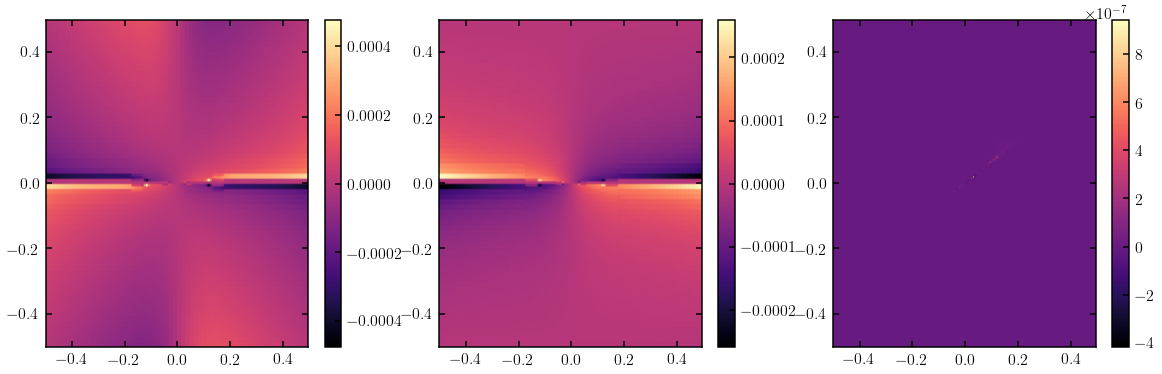

In [6]:
it = 100000
# J_x

icent = int(len(xbig)/2)
plt.figure(figsize=(20,6))
plt.subplot(131)
plt.pcolormesh(xbig, xbig, big_data[icent,:,:], shading='gouraud')
plt.colorbar()
plt.subplot(132)
plt.pcolormesh(xbig, xbig, big_data[:,icent,:], shading='gouraud')
plt.colorbar()
plt.subplot(133)
plt.pcolormesh(xbig, xbig, big_data[:,:,icent], shading='gouraud')
plt.colorbar()

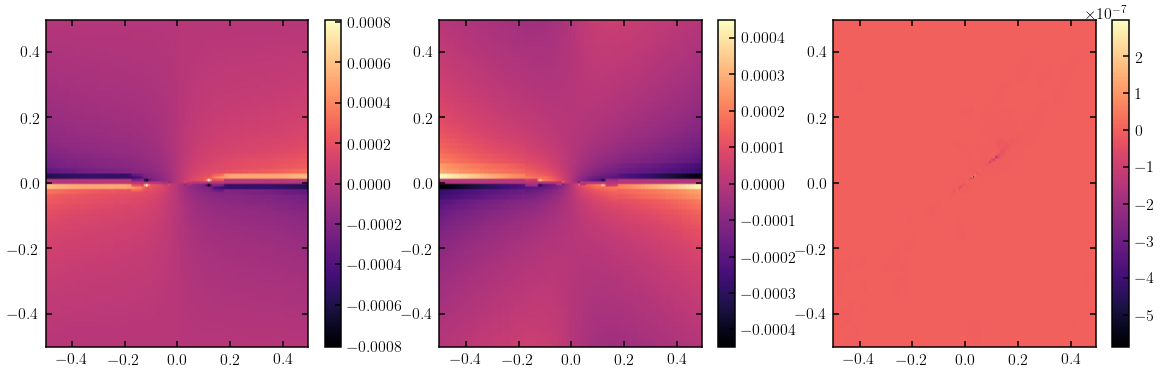

In [8]:
# J_y

icent = int(len(xbig)/2)
plt.figure(figsize=(20,6))
plt.subplot(131)
plt.pcolormesh(xbig, xbig, big_data[icent,:,:], shading='gouraud')
plt.colorbar()
plt.subplot(132)
plt.pcolormesh(xbig, xbig, big_data[:,icent,:], shading='gouraud')
plt.colorbar()
plt.subplot(133)
plt.pcolormesh(xbig, xbig, big_data[:,:,icent], shading='gouraud')
plt.colorbar()

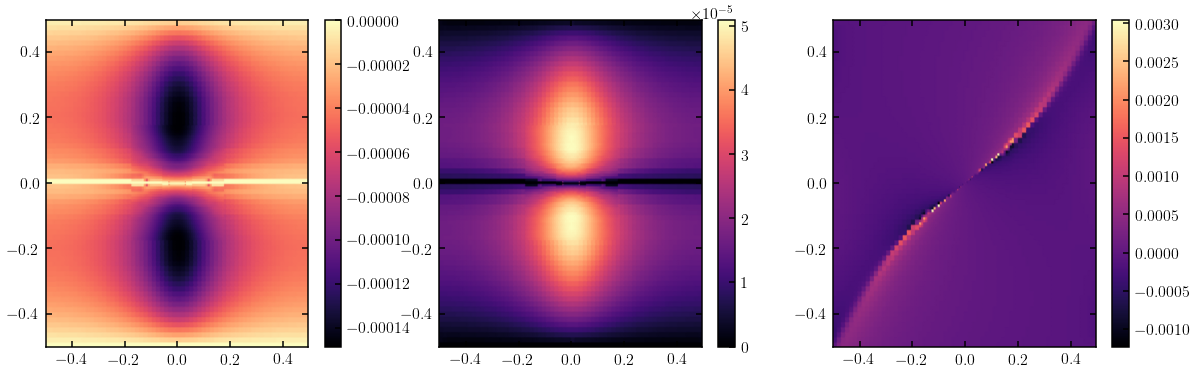

In [10]:
# J_z

icent = int(len(xbig)/2)
plt.figure(figsize=(20,6))
plt.subplot(131)
plt.pcolormesh(xbig, xbig, big_data[icent,:,:], shading='gouraud')
plt.colorbar()
plt.subplot(132)
plt.pcolormesh(xbig, xbig, big_data[:,icent,:], shading='gouraud')
plt.colorbar()
plt.subplot(133)
plt.pcolormesh(xbig, xbig, big_data[:,:,icent], shading='gouraud')
plt.colorbar()